In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Linear_Regression_dataset.csv to Linear_Regression_dataset.csv


In [ ]:
data_df = pd.read_csv("Linear_Regression_dataset.csv")
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data_df['date'] = data_df['date'].str.replace('T000000', '')


In [ ]:
data_array = data_df.drop(columns=['id','date']).to_numpy()
assert (data_array.shape == (21613,19))
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
mean = np.mean(data_array,axis=0)
sd = np.std(data_array,axis=0)

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 19)


In [ ]:
labels= data_df['price'].to_numpy()
x_array_norm = np.delete(data_array_norm, 0, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 18) (3242, 18) (18371,) (3242,)


In [ ]:
def loss(y_pred,y_true):
  mse =np.mean(y_pred-y_true)**2

  return mse

In [ ]:
def y(x,a,b):

  m,n = x.shape
  y_pred = np.dot(x, a) + b

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  m,n = x.shape
  yp = y(x,a,b)
  error = y_true - yp

  da = -2/m * np.dot(x.T, error)
  db = -2/m * np.sum(error)

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x, y_true, learning_rate=0.01, epochs=10):
    m, n = x.shape
    loss_mse = []

    a = np.zeros(n)
    b = 0.0

    for i in range(epochs):

        da, db = gradient(x, a, b, y_true)
        a = a - learning_rate * da
        b = b - learning_rate * db

        y_pred = y(x, a, b)
        l_mse = loss(y_pred, y_true)

        loss_mse.append(l_mse)

        print("Epoch", i + 1, "Completed! Loss =", l_mse)

    print("Training completed!!")

    assert a.shape == (n,)
    return (loss_mse, a, b)


In [ ]:
labels= data_df['price'].to_numpy()
x_array_norm = np.delete(data_array_norm, 0, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

epochs = 100
learn_rate = 0.01

train_loss, a, b = gradient_descent(x_train, y_train, learning_rate=learn_rate, epochs=epochs)

(18371, 18) (3242, 18) (18371,) (3242,)
Epoch 1 Completed! Loss = 278301740779.34436
Epoch 2 Completed! Loss = 267323275269.054
Epoch 3 Completed! Loss = 256775523937.92712
Epoch 4 Completed! Loss = 246641854544.26868
Epoch 5 Completed! Loss = 236906246020.03635
Epoch 6 Completed! Loss = 227553269783.47537
Epoch 7 Completed! Loss = 218568071137.42526
Epoch 8 Completed! Loss = 209936350828.36533
Epoch 9 Completed! Loss = 201644346828.8511
Epoch 10 Completed! Loss = 193678816395.1971
Epoch 11 Completed! Loss = 186027018442.90234
Epoch 12 Completed! Loss = 178676696274.2013
Epoch 13 Completed! Loss = 171616060685.10782
Epoch 14 Completed! Loss = 164833773473.26575
Epoch 15 Completed! Loss = 158318931362.70084
Epoch 16 Completed! Loss = 152061050357.09088
Epoch 17 Completed! Loss = 146050050529.32593
Epoch 18 Completed! Loss = 140276241251.8534
Epoch 19 Completed! Loss = 134730306869.50908
Epoch 20 Completed! Loss = 129403292814.16943
Epoch 21 Completed! Loss = 124286592158.56694
Epoch 22 

Loss on test data = 6228121125.238866


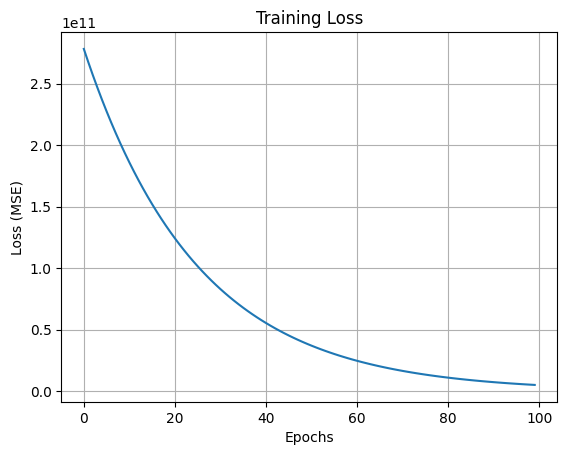

In [ ]:
y_pred_test = y(x_test, a, b)
test_loss = loss(y_pred_test, y_test)

print("Loss on test data =", test_loss)

plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()
